# Assignment 2 (24 + 6 Points)

The goal of this assignment is to get a better understanding of **permutation tests**, **regression** and **cross-validation**.

## Deadline
The deadline for this assignment is on **January 26th, 2025** at **23:59**. This is a hard deadline, therefore, no late submissions will be accepted.

You submit your assignment in the TeachCenter. Multiple submissions are allowed, so you can submit your code as often as you want. The last submission before the deadline will be graded; we have no access to previous versions.

## Submission Files
When you have completed the assignment, you will submit **exactly one** file:

- `<your-matr-number>_assignment2.ipynb`: This file contains all the code for the tasks.

Only Jupyter notebooks are allowed!
Do not submit any other files. Make sure you use Python version ≥3.10.

**Important**: Please make sure that your uploaded file is named correctly: 
`<your-matr-number>_assignment2.ipynb`.

Doing otherwise will lead to **point deductions**!

**Example**: 
 - Student with matr nr. 00123456 -> `00123456_assignment2.ipynb`
 - Student with matr nr. 12345678 -> `12345678_assignment2.ipynb`

## Datasets
We provide you with 2 different datasets (points.csv, games.csv). In the **assingment** both datasets are used and you are free to experiment with different feature columns.

In the **quizzes**, it will be specified in each question which feature column to use.

## Quizzes
Quizzes will be available in TeachCenter. The questions will focus on your implemented functions and their correctness. You will be given a set of possible results for **specific** function **parameters**. Your task is to select the correct answer based on **your functions'** output.

You have **unlimited time** for answering the questions during the test, but the deadline will be the same as for the code part (**January 26th, 2025** at **23:59**).

You have **two** attempts for each quiz and the **last attempt** counts.

## Code
Make sure you do **not** change the provided function headers (name, parameters, return type, etc.).
Make sure you define all needed variables **inside** the function!
Check for correct indentation!

## Plots
For plotting you are allowed to use the following packages: `matplotlib` or `seaborn`.

Ensure that your plots meet the minimum requirements outlined in the task description, and feel free to enhance them with additional information to improve clarity and visual appeal. It is not neccessary to store the plots as an image and submit them. Just show the plot in the notebook (e.g. plt.show() in matplotlib).

## Assistence
Please use the **Assignment 2 - Forum** section in the TC to ask questions regarding the tasks. Link to the forum: [Assignment 2 - Forum](https://tc.tugraz.at/main/mod/forum/view.php?id=472550)

## Plagiarism
By submitting your work, you agree that plagiarism tools will process your work.

You are allowed to discuss your assignment with colleagues, but you are not allowed to jointly work on the assignment, copy solutions, or share your code with others!

## AI Assistance

AI for assistance is allowed under the following conditions:
 - **Sparse usage**. Generating complete solutions without your own contribution is
prohibited.
 - Mark passages generated by AI. Link to source, i.e., chat history that was used for
generating the answers.
 - Similar to how StackOverflow can be used to provide assistance
(mark and link to source).
 - Example: Comment in function with
”This function was generated using ChatGPT: $\text{<link to chat>}$”

## Allowed Packages

Only use the already imported packages in the assignment template. If you really need additional packages (which shouldn't be the case), request it in the forum.

In [2]:
!pip install pandas numpy scipy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator

## Provided Functions


In [4]:
def read_points_data(filter_1: str, filter_2: str, split_data: bool = False) -> pd.DataFrame | tuple[pd.Series, pd.Series]:
    """
    This helper function reads in the `points.csv` file and filters the data base on two specifies rows. 

    Args:
        filter_1 (str): The first row value to filter by.
        filter_2 (str): The second row value to filter by.
        split_data (bool): Indicates whether to split the data into two separate datasets or not.

    Returns:
        pd.DataFrame: A `pandas` `DataFrame` containing the filtered data OR
        tuple[pd.Series, pd.Series]: Two separated `pandas` `Series` containing the filtered data.
    """
    data = pd.read_csv("points.csv")
    if split_data:
        data1 = data[data["lecturer"] == filter_1]
        data2 = data[data["lecturer"] == filter_2]
        return data1.points, data2.points

    return data[data["lecturer"].isin([filter_1, filter_2])]

def read_games_data(relevant_columns: list[str], split_data: bool = False) -> pd.DataFrame | tuple[pd.Series, ...]:
    """
    This helper function reads in the `games.csv` file and filters the data based on the given `relevant_columns`.

    Args:
        relevant_columns (list[str]): The columns that should be kept.
        split_data (bool): Indicates whether to split the data into separate datasets or not.

    Returns:
        pd.DataFrame: A `pandas` `DataFrame` containing the relevant columns data OR
        tuple[pd.Series, ...]: Separated `pandas` `Series` containing the relevant columns.
    """
    data = pd.read_csv("games.csv")
    if split_data:
        return tuple(data[col] for col in relevant_columns)

    return data[relevant_columns]


# Tasks


---

## Part 1: Permutation Test
We want to find out if there is evidence that the 2 given datasets come from different distributions.

**Tasks:**
- Follow the `TODOs` in the next cell.
- In the assignment you are free to try out comparing lecturers `A`, `B`, `C`, or `D`.
- In the quizzes it will be specified.

In [8]:
def permutation_test(data_1: pd.Series, data_2: pd.Series, num_permutations: int, random_state: int) -> float:

    np.random.seed(random_state)
    
    
    data_combined = np.concatenate([data_1, data_2])   #Data combined so i can simulate a random distribution
    
    
    observed_diff = abs(data_1.mean() - data_2.mean())   #Here we have the absolute difference in means
    
    
    count = 0                                            #Permutation test being performed
    for _ in range(num_permutations):
        
        np.random.shuffle(data_combined)                # We shuffle and split the data that is combined
        perm_data_1 = data_combined[:len(data_1)]
        perm_data_2 = data_combined[len(data_1):]
        
        perm_diff= abs(np.mean(perm_data_1) - np.mean(perm_data_2))  # Here i calculated the observed abs. difference in means for 
        if perm_diff >= observed_diff:                               # to use as test statistic
            count += 1
    
    # the p-value calculated and returned
    p_value = count / num_permutations
    return p_value

# Using the example but i just changed up did not keep it exactly the same since we are allowed to do that
points_1, points_2 = read_points_data("A", "C", True)
points = read_points_data("B", "D", False)

# Calling the permutation_test function with number of permutations and random state of my liking
p_value = permutation_test(points_1, points_2, num_permutations=10000, random_state=12)

print(f"p-value: {p_value}")

p-value: 0.0151


## Part 2: Linear Regression with Least Squares

Fit a simple linear regression model using the least squares method.

**Tasks:**
- Follow the `TODOs` in the next cell.
- In the assignment you are free to try out different feature columns from the `games.csv` dataset againse `price`.
- In the quizzes it will be specified.

slope: 0.006, intercept: 16.436, RSS: 164218.981


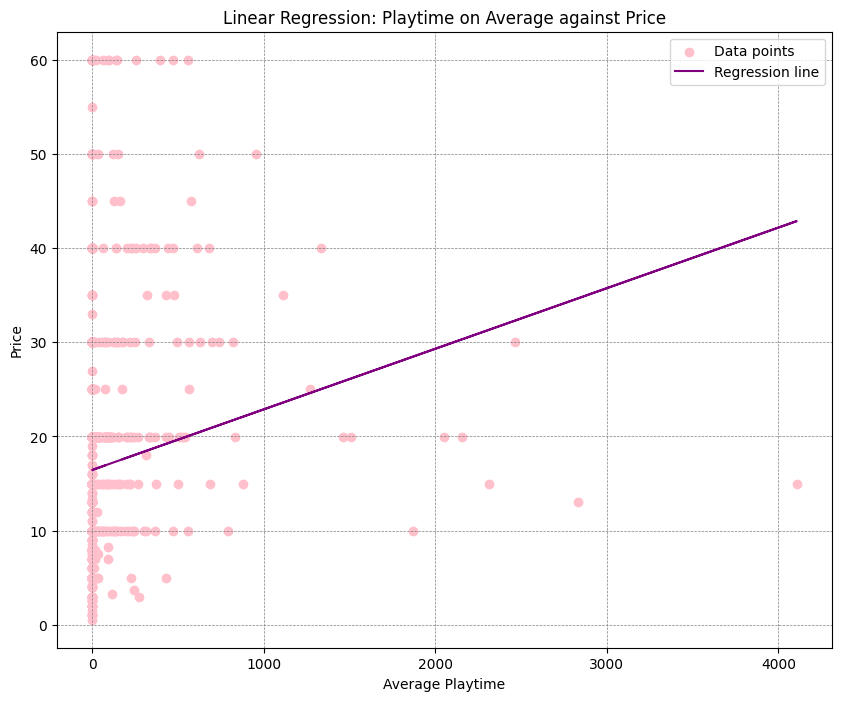

In [14]:
def linear_regression(x: pd.Series, y: pd.Series) -> tuple[float, float, float]:
 

    x_array = x.values.reshape(-1, 1)      #Here i reshape x for the linear regression 
    y_values = y.values                    #model (sklearn expets such format for features)

    model = LinearRegression()         #Fitting the linear regression model
    model.fit(x_array, y_values)
    

    slope = model.coef_[0]          #Slope and intercept extraction
    intercept = model.intercept_
    

    y_pred = model.predict(x_array)           #We need to predict values and calculate RSS
    rss = np.sum((y_values - y_pred) ** 2)

    
    return slope, intercept, rss







def plot_regression_line(x: pd.Series, y: pd.Series, slope: float, intercept: float) -> None:

    plt.figure(figsize=(10, 8))
    
    
    plt.scatter(x, y, color="pink", label="Data points")       # Scatter plot of the data
    
    
    regression_line = slope * x + intercept                      # Regression line
    plt.plot(x, regression_line, color="purple", label="Regression line")
    
    plt.xlabel("Average Playtime")                                # Axes and title
    plt.ylabel("Price")
    plt.title("Linear Regression: Playtime on Average against Price")

    plt.legend()
    plt.grid(color="gray", linestyle="--", linewidth=0.5)
    plt.show()


x, y = read_games_data(["average_playtime", "price"], True)      # Using the example:
data = read_games_data(["average_playtime", "price"], False)

                                                         # Fitting the linear regression model
slope, intercept, rss = linear_regression(x, y)
print(f"slope: {round(slope, 3)}, intercept: {round(intercept, 3)}, RSS: {round(rss, 3)}")



plot_regression_line(x, y, slope, intercept)

## Part 3: Cross-Validation and Model Selection

To evaluate multiple linear regression models using cross-validation and select the best model based on the RSS metric.

**Tasks:**
- Follow the `TODOs` in the next cell.
- In the assignment you are allowed to test cross-validation with different k and feature columns. Call the plot function with metrics of 2 different models: LinearRegression, Ridge.
- In the quizzes k and feature columns will be specified.
- For Ridge, leave the hyperparameter *alpha* at 1.

Mean RSS: 27461.91518072315


C:\Users\tring\AppData\Local\Temp\ipykernel_20216\2093149044.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(metrics.values(), labels=metrics.keys(), showmeans=True, meanline=True)


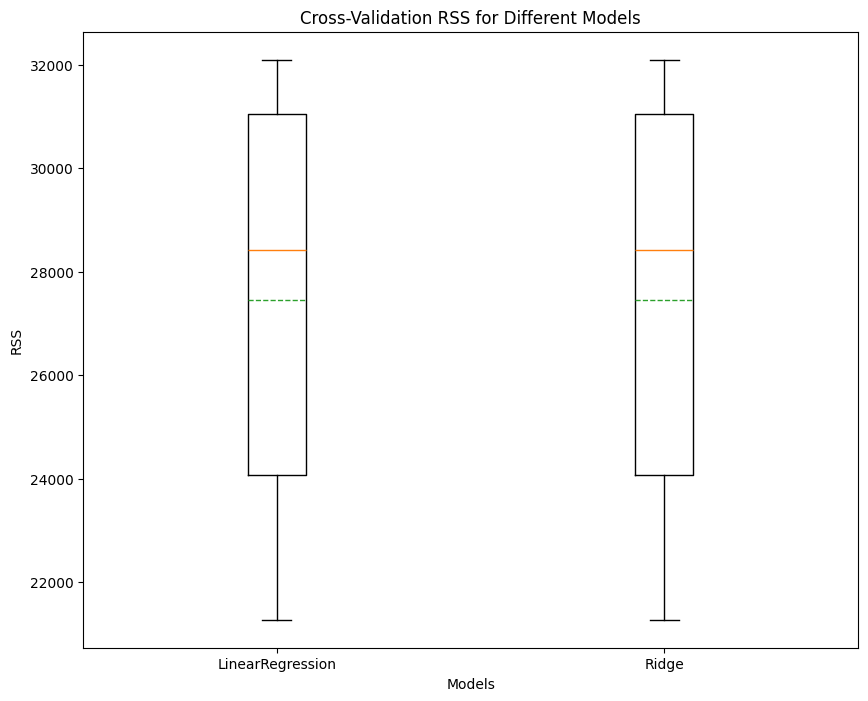

In [15]:
def k_fold_cross_validation(x: pd.Series, y: pd.Series, model: BaseEstimator, k: int = 5, random_state: int = 0) -> list[float]:

    
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state) #K-fold cross-validation using `KFold`.
    k_rss = []

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index] #Data splitted into training and testing
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]   #sets for the current fold

        
        model.fit(x_train.values.reshape(-1, 1), y_train)         #Fitting model on the training data

        
        predictions = model.predict(x_test.values.reshape(-1, 1))  #Predicting on test data

        
        rss = ((y_test - predictions) ** 2).sum()                  #Calculating RSS for the current fold
        k_rss.append(rss)

    return k_rss




def plot_boxplot_cross_validation(metrics: dict[str, list[float]]) -> None:

    #Generated the boxplot for each key in the dictionary.
    plt.figure(figsize=(10, 8))                                
    plt.boxplot(metrics.values(), labels=metrics.keys(), showmeans=True, meanline=True)   

    plt.xlabel("Models")               #labels and title
    plt.ylabel("RSS")

    plt.title("Cross-Validation RSS for Different Models")
    plt.show()


x, y = read_games_data(["average_playtime","price"], True)



model = LinearRegression()            #Initilizing model i want to cross-validate


k_rss = k_fold_cross_validation(x, y, model, k=6, random_state= 121) #Calling the k-fold validation
print(f"Mean RSS: {np.mean(k_rss)}")                                   #with the correct arguments

                                                                    #finishing up the last part of the TODO:
metrics = {
    'LinearRegression': k_rss,
    'Ridge': k_fold_cross_validation(x, y, Ridge(alpha=1), k=6, random_state= 121)
}

plot_boxplot_cross_validation(metrics)                 #plot_boxplot_cross_validation 
                                                        #function with the correct arguments.